In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

stud_math = pd.read_csv('/Users\Darya\Desktop/stud_math.csv')

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [157]:
display(math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [158]:
stud_math.rename(columns={'Pstatus': 'pstatus', 'Medu': 'medu', 'Fedu': 'fedu', 'Mjob': 'mjob', 
                          'Fjob': 'fjob', 'studytime, granular': 'studytime_granular'}, inplace=True)

#переводим все стоблцы в нижний регистр, меняем запятую на _ в столбце, которого нет в описании


In [159]:
display(stud_math.head(5))

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Рассмотрим столбцы по отдельности:

In [160]:
# рассмотрим, сколько школ в датасете
pd.DataFrame(stud_math.school.value_counts(dropna=False, normalize=True))

,school
GP,0.883544
MS,0.116456


 значит, всего школ 2 и нет пропусков

In [161]:
stud_math.loc[:,['studytime','studytime_granular']] 
# сравниваем два столбца, который был в описании и которого не было

,studytime,studytime_granular
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
5,2.0,-6.0
6,2.0,-6.0
7,2.0,-6.0
8,2.0,-6.0
9,2.0,-6.0


In [162]:
# второе это умножение первого на -3
# проверим корреляцию столбцов
stud_math['studytime'].corr(stud_math['studytime_granular'])

-1.0

In [163]:
# корреляция обратная на сто процентов, следовательно, столбец не нужен
stud_math.drop(['studytime_granular'], inplace = True, axis = 1)

In [164]:
# продолжаем анализ столбца studytime
pd.DataFrame(stud_math.studytime.value_counts(
    dropna=False, normalize=True))

,studytime
2.0,0.491139
1.0,0.260759
3.0,0.162025
4.0,0.068354
NaN,0.017722


Видим, что дополнительное образование занимает 2-5 часов, а следовательно, можно заменить неизвестные значения на моду.

In [165]:
students_init.studytime = students_init.studytime.apply(lambda x: 1 
                                                        if pd.isnull(x) else x)

pd.DataFrame(students_init.studytime.value_counts(dropna=False, normalize=True))

NameError: name 'students_init' is not defined

Рассмотрим столбец с полом учеников:

In [166]:
pd.DataFrame(stud_math.sex.value_counts(dropna=False, normalize=True))

,sex
F,0.526582
M,0.473418


Пола два, пустых значений нет.

Рассмотрим столбец с возрастом:

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

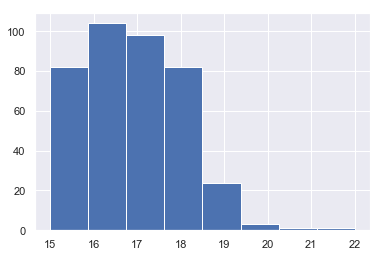

In [167]:
# построим гистограмму распределения возрастов
stud_math.age.hist(bins=8)
stud_math.age.describe()

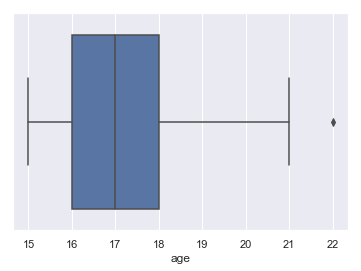

In [168]:
# рассмотрим также данные на боксплоте:
sns.set()
sns.boxplot(stud_math['age'])

Видно, что есть выбросы учеников, которым 22 года, хотя основной возрат 16-18 лет. Не будем удалять выброс, для дальнейшей работы.

Рассмотрим столбец с адресом:

In [169]:
pd.DataFrame(stud_math.address.value_counts(dropna=False, normalize=True))

,address
U,0.746835
R,0.210127
NaN,0.043038


Видим, что есть пустые значения, но т.к. их мало, можно заменить модой 'U'.

In [170]:
stud_math.address = stud_math.address.astype(str).apply(lambda x: 'U' 
                                                        if x == 'nan' else x)

pd.DataFrame(stud_math.address.value_counts(dropna=False, normalize=True))

,address
U,0.789873
R,0.210127


Рассмотрим столбец о размере семьи:

In [171]:
pd.DataFrame(stud_math.famsize.value_counts(dropna=False, normalize=True))

,famsize
GT3,0.660759
LE3,0.270886
NaN,0.068354


Заменим нулевые значения модой 'GT3'.

In [172]:
stud_math.famsize = stud_math.famsize.astype(str).apply(lambda x: 'GT3' 
                                                        if x == 'nan' else x)

pd.DataFrame(stud_math.famsize.value_counts(dropna=False, normalize=True))

,famsize
GT3,0.729114
LE3,0.270886


Рассмотрим столбец об образовании матери:

In [173]:
pd.DataFrame(stud_math.medu.value_counts(dropna=False, normalize=True))

,medu
4.0,0.331646
2.0,0.258228
3.0,0.245570
1.0,0.149367
0.0,0.007595
NaN,0.007595


Большинство матерей (~33%) с высшим образованием, и меньше 1% матерей не имеют образования. В колонке мало пропущенных значений, заменим их модой 4 - высшее образование:

In [174]:
stud_math.medu = stud_math.medu.apply(lambda x: 4.0 
                                      if pd.isnull(x) else x)

pd.DataFrame(stud_math.medu.value_counts(dropna=False, normalize=True))

,medu
4.0,0.339241
2.0,0.258228
3.0,0.245570
1.0,0.149367
0.0,0.007595


Рассмотрим столбец об образовании отца:

In [175]:
pd.DataFrame(stud_math.fedu.value_counts(dropna=False, normalize=True))

,fedu
2.0,0.268354
3.0,0.243038
4.0,0.222785
1.0,0.197468
NaN,0.060759
0.0,0.005063
40.0,0.002532


Появилось значение 40.0 - это, скорее всего, ошибка и имелось ввиду 4.0. Процент неизвестных значений большой, а также распределение равномерное, поэтому нельзя заменить неизвестные значения на моду, а значит меняем только ошибочное значение. Кроме того, можно построить тепловую карту, сравнивая образование отца с образованием матери по здравому смыслу.

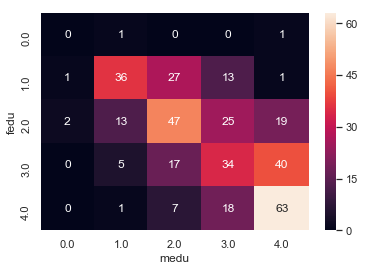

In [176]:
stud_math['fedu'] = stud_math['fedu'].replace(40, 4)
pd.DataFrame(stud_math.fedu.value_counts(dropna=False, normalize=True))

sns.heatmap(pd.crosstab(stud_math['fedu'], stud_math['medu']), annot=True)

Видим, что образование отца плюс минус равно образованию матери, а значит можем взять недостающие значения из значений матери.

In [177]:
stud_math.fedu = stud_math.fedu.mask(
    stud_math.fedu.isnull(), stud_math.medu)

pd.DataFrame(stud_math.fedu.value_counts(dropna=False, normalize=True))

,fedu
2.0,0.278481
3.0,0.260759
4.0,0.250633
1.0,0.205063
0.0,0.005063


Видим, что пустые значение равномерно распределились, общая тендеция сохранилась. Все спасены!

Рассмотрим столбец с работой матери:

In [178]:
pd.DataFrame(stud_math.mjob.value_counts(dropna=False, normalize=True))

,mjob
other,0.336709
services,0.248101
at_home,0.146835
teacher,0.139241
health,0.081013
NaN,0.048101


Видим, что большинство профессий - other, а следовательно можно заменить на такую же моду.

In [179]:
stud_math.mjob = stud_math.mjob.apply(lambda x: 'other' 
                                      if pd.isnull(x) else x)

pd.DataFrame(stud_math.mjob.value_counts(dropna=False, normalize=True))

,mjob
other,0.384810
services,0.248101
at_home,0.146835
teacher,0.139241
health,0.081013


Рассмотрим столбец с работой отца:

In [180]:
pd.DataFrame(stud_math.fjob.value_counts(dropna=False, normalize=True))

,fjob
other,0.498734
services,0.258228
NaN,0.091139
teacher,0.073418
at_home,0.040506
health,0.037975


Видим, что почти всё то же самое, что и с работой матери, а значит делаем всё то же самое. Как приятно!

In [181]:
stud_math.fjob = stud_math.fjob.apply(lambda x: 'other' 
                                              if pd.isnull(x) else x)

pd.DataFrame(stud_math.fjob.value_counts(dropna=False, normalize=True))

,fjob
other,0.589873
services,0.258228
teacher,0.073418
at_home,0.040506
health,0.037975


Рассмотрим столбец с причиной выбора школы:

In [182]:
pd.DataFrame(stud_math.reason.value_counts(dropna=False, normalize=True))


,reason
course,0.346835
home,0.263291
reputation,0.260759
other,0.086076
NaN,0.043038


Главная причина выбора школы - образовательная программа, а значит можно заменить на эту моду.

In [183]:
stud_math.reason = stud_math.reason.apply(lambda x: 'course' 
                                                  if pd.isnull(x) else x)

pd.DataFrame(stud_math.reason.value_counts(dropna=False, normalize=True))

,reason
course,0.389873
home,0.263291
reputation,0.260759
other,0.086076


Рассмотрим столбец с опекуном:

In [184]:
pd.DataFrame(stud_math.guardian.value_counts(dropna=False, normalize=True))

,guardian
mother,0.632911
father,0.217722
NaN,0.078481
other,0.070886


Чаще всего опекун - мать, а значит меняем неизвестные значения на моду матери.

In [185]:
stud_math.guardian = stud_math.guardian.apply(lambda x: 'mother' 
                                              if pd.isnull(x) else x)

pd.DataFrame(stud_math.guardian.value_counts(dropna=False, normalize=True))

,guardian
mother,0.711392
father,0.217722
other,0.070886


Рассмотрим столбец времени в пути до школы:

In [186]:
pd.DataFrame(stud_math.traveltime.value_counts(dropna=False, normalize=True))

,traveltime
1.0,0.612658
2.0,0.243038
NaN,0.070886
3.0,0.055696
4.0,0.017722


Большинство значений приходится на 1, а также есть 7% пустых значений. С тревожностью заменяем их на моду 1 и надеемся на лучшее и здравый смысл.

In [187]:
stud_math.traveltime = stud_math.traveltime.apply(lambda x: 1 
                                                  if pd.isnull(x) else x)

pd.DataFrame(stud_math.traveltime.value_counts(dropna=False, normalize=True))

,traveltime
1.0,0.683544
2.0,0.243038
3.0,0.055696
4.0,0.017722


Рассмотрим столбец внеучебных неудач:

In [188]:
pd.DataFrame(stud_math.failures.value_counts(dropna=False, normalize=True))

,failures
0.0,0.741772
1.0,0.124051
NaN,0.055696
2.0,0.040506
3.0,0.037975


Видим, что в принципе распределение равное, но в основном 0, значит пустые значения заменяем на ноль.

In [189]:
stud_math.failures = stud_math.failures.apply(lambda x: 1 
                                              if pd.isnull(x) else x)

pd.DataFrame(stud_math.failures.value_counts(dropna=False, normalize=True))

,failures
0.0,0.741772
1.0,0.179747
2.0,0.040506
3.0,0.037975


Рассмотрим столбец с дополнительной поддержкой:

In [190]:
pd.DataFrame(stud_math.schoolsup.value_counts(dropna=False, normalize=True))

,schoolsup
no,0.848101
yes,0.129114
NaN,0.022785


Столбец бинарный, большинство ответов 'нет', есть пустые значения. Меняем!

In [191]:
stud_math.schoolsup = stud_math.schoolsup.apply(lambda x: 'no' 
                                                if pd.isnull(x) else x)

pd.DataFrame(stud_math.schoolsup.value_counts(dropna=False, normalize=True))

,schoolsup
no,0.870886
yes,0.129114


Рассмотрим столбец семейной поддержки:

In [192]:
pd.DataFrame(stud_math.famsup.value_counts(dropna=False, normalize=True))

,famsup
yes,0.554430
no,0.346835
NaN,0.098734


Бинарный. Меняем!

In [193]:
stud_math.famsup = stud_math.famsup.apply(lambda x: 'yes' 
                                          if pd.isnull(x) else x)

pd.DataFrame(stud_math.famsup.value_counts(dropna=False, normalize=True))

,famsup
yes,0.653165
no,0.346835


Рассмотрим столбец платных занятий по математике:

In [194]:
pd.DataFrame(stud_math.paid.value_counts(dropna=False, normalize=True))

,paid
no,0.506329
yes,0.392405
NaN,0.101266


Слишком много пустых значений, но нельзя вывести из других столбцов что-то похожее. Делаем вид, что платить никто не может, меняем пропуски на "нет".

In [195]:
stud_math.paid = stud_math.paid.apply(lambda x: 'no' 
                                      if pd.isnull(x) else x)

pd.DataFrame(stud_math.paid.value_counts(dropna=False, normalize=True))

,paid
no,0.607595
yes,0.392405


Рассмотрим столбец с внеучебными занятиями:

In [196]:
pd.DataFrame(stud_math.activities.value_counts(dropna=False, normalize=True))

,activities
yes,0.493671
no,0.470886
NaN,0.035443


Пустых значений мало, можем заменить на моду большего значения.

In [197]:
stud_math.activities = stud_math.activities.apply(lambda x: 'yes' 
                                                  if pd.isnull(x) else x)

pd.DataFrame(stud_math.activities.value_counts(
    dropna=False, normalize=True))

,activities
yes,0.529114
no,0.470886


Рассотрим столбец с посещением детского сада:

In [198]:
pd.DataFrame(stud_math.nursery.value_counts(dropna=False, normalize=True))

,nursery
yes,0.759494
no,0.200000
NaN,0.040506


Меняем пустые значения на "да".

In [199]:
stud_math.nursery = stud_math.nursery.apply(lambda x: 'yes' 
                                                    if pd.isnull(x) else x)

pd.DataFrame(stud_math.nursery.value_counts(dropna=False, normalize=True))

,nursery
yes,0.8
no,0.2


Рассмотрим столбец высшего образования:

In [200]:
pd.DataFrame(stud_math.higher.value_counts(dropna=False, normalize=True))

,higher
yes,0.901266
NaN,0.050633
no,0.048101


Все хотят получить высшее образование. Ура! Меняем пустые на "да".

In [201]:
stud_math.higher = stud_math.higher.apply(lambda x: 'yes' 
                                          if pd.isnull(x) else x)

pd.DataFrame(stud_math.higher.value_counts(dropna=False, normalize=True))

,higher
yes,0.951899
no,0.048101


Рассмотрим столбец с интернетом:

In [202]:
pd.DataFrame(stud_math.internet.value_counts(dropna=False, normalize=True))

,internet
yes,0.772152
no,0.141772
NaN,0.086076


Меняем на моду "да", т.к. значений больше.

In [203]:
stud_math.internet = stud_math.internet.apply(lambda x: 'yes' 
                                              if pd.isnull(x) else x)

pd.DataFrame(stud_math.internet.value_counts(dropna=False, normalize=True))

,internet
yes,0.858228
no,0.141772


Рассмотрим столбец с отношениями:

In [204]:
pd.DataFrame(stud_math.romantic.value_counts(dropna=False, normalize=True))

,romantic
no,0.607595
yes,0.313924
NaN,0.078481


Большинство учеников не в отношениях, пустые меняем на "нет".

In [205]:
stud_math.romantic = stud_math.romantic.apply(lambda x: 'no' 
                                              if pd.isnull(x) else x)

pd.DataFrame(stud_math.romantic.value_counts(dropna=False, normalize=True))

,romantic
no,0.686076
yes,0.313924


Рассмотрим столбец семейных отношений:

In [206]:
pd.DataFrame(stud_math.famrel.value_counts(dropna=False, normalize=True))

,famrel
4.0,0.460759
5.0,0.250633
3.0,0.156962
NaN,0.068354
2.0,0.043038
1.0,0.017722
-1.0,0.002532


Не думаю, что есть явная зависимость между этим показателем и столбцом с результатами, поэтому меняем пустые значения на большинство (4.0) и меняем значение -1.0 на 1.0.

In [207]:
stud_math.famrel = stud_math.famrel.apply(lambda x: 4 
                                          if pd.isnull(x) else x)
stud_math['famrel'] = stud_math['famrel'].replace(-1, 1)

pd.DataFrame(stud_math.famrel.value_counts(dropna=False, normalize=True))

,famrel
4.0,0.529114
5.0,0.250633
3.0,0.156962
2.0,0.043038
1.0,0.020253


Рассмотрим столбец свободного времени:

In [208]:
pd.DataFrame(stud_math.freetime.value_counts(dropna=False, normalize=True))

,freetime
3.0,0.387342
4.0,0.283544
2.0,0.159494
5.0,0.096203
1.0,0.045570
NaN,0.027848


У большинства учеников есть свободное время, меняем.

In [209]:
stud_math.freetime = stud_math.freetime.apply(lambda x: 3 
                                              if pd.isnull(x) else x)

pd.DataFrame(stud_math.freetime.value_counts(dropna=False, normalize=True))

,freetime
3.0,0.415190
4.0,0.283544
2.0,0.159494
5.0,0.096203
1.0,0.045570


Рассмотрим столбец проведения времени с друзьями:

In [210]:
pd.DataFrame(stud_math.goout.value_counts(dropna=False, normalize=True))

,goout
3.0,0.321519
2.0,0.255696
4.0,0.212658
5.0,0.131646
1.0,0.058228
NaN,0.020253


Можно заменить на большее значение (3.0).

In [211]:
stud_math.goout = stud_math.goout.apply(lambda x: 3 
                                        if pd.isnull(x) else x)

pd.DataFrame(stud_math.goout.value_counts(dropna=False, normalize=True))

,goout
3.0,0.341772
2.0,0.255696
4.0,0.212658
5.0,0.131646
1.0,0.058228


Рассмотрим столбец со здоровьем:

In [212]:
pd.DataFrame(stud_math.health.value_counts(dropna=False, normalize=True))

,health
5.0,0.349367
3.0,0.225316
4.0,0.159494
1.0,0.118987
2.0,0.108861
NaN,0.037975


Можем поменять пустые значения на моду 5.0.

In [213]:
stud_math.health = stud_math.health.apply(lambda x: 5 
                                          if pd.isnull(x) else x)

pd.DataFrame(stud_math.health.value_counts(dropna=False, normalize=True))

,health
5.0,0.387342
3.0,0.225316
4.0,0.159494
1.0,0.118987
2.0,0.108861


Рассмотрим столбец с количеством пропущенных занятий:

In [214]:
stud_math.absences.isnull().sum() # количество пустых значений

12

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

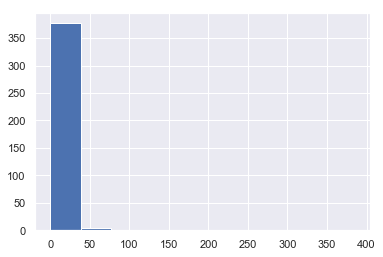

In [215]:
stud_math.absences.hist() 
stud_math.absences.describe()
# распределение пропусков

count    395.000000
mean       7.179747
std       23.111967
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

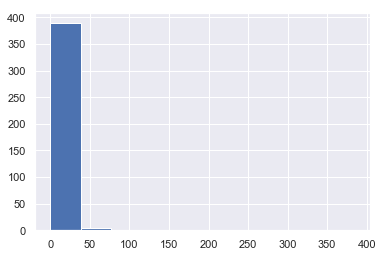

In [216]:
stud_math.absences = stud_math.absences.apply(
    lambda x: 4 if pd.isnull(x) else x)
# заменяем на медианное значение
# оценим, как изменилось распределение:
stud_math.absences.hist()
stud_math.absences.describe()

Очень большой разброс в значениях. Необходимо посмотреть выбросы.

In [217]:
median = stud_math.absences.median()
IQR = stud_math.absences.quantile(
    0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


count    378.000000
mean       4.584656
std        4.886996
min        0.000000
25%        0.000000
50%        4.000000
75%        6.750000
max       20.000000
Name: absences, dtype: float64

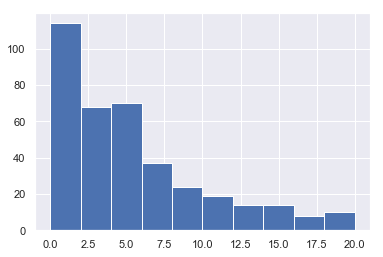

In [218]:
#Границы выбросов - -12-20, очистим данные, которые выходят за пределы верхней границы.
stud_math = stud_math[stud_math.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
stud_math.absences.hist()
stud_math.absences.describe()

Переходим к главному столбцу - баллы по математике.

In [219]:
stud_math.score.isnull().sum() #количество пустых значений
stud_math[stud_math.score.isnull()] #выведем
#количество пустых значений

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,no,yes,yes,yes,no,no,4.0,3.0,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,U,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,yes,yes,no,4.0,3.0,5.0,5.0,4.0,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,yes,no,yes,yes,yes,yes,no,5.0,3.0,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,yes,yes,no,4.0,5.0,3.0,4.0,3.0,NaN
350,MS,M,19,U,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,yes,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


In [220]:
stud_math.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True) #удаляем пустые значения, т.к. в них нет смысла
stud_math.score.value_counts(dropna=False, normalize=True) #выводим оценки

50.0     0.146341
55.0     0.112805
0.0      0.100610
75.0     0.085366
60.0     0.082317
65.0     0.079268
40.0     0.076220
70.0     0.073171
45.0     0.064024
80.0     0.048780
30.0     0.033537
35.0     0.027439
90.0     0.021341
25.0     0.021341
95.0     0.015244
85.0     0.009146
100.0    0.003049
Name: score, dtype: float64

count    328.000000
mean      51.920732
std       23.040314
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

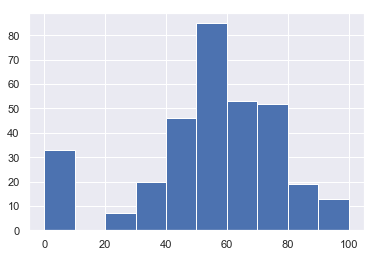

In [221]:
stud_math.score.hist(bins=10)
stud_math.score.describe()

Есть ученики, у которых оценка 0. Выводим на экран.

In [222]:
stud_math[stud_math.score == 0]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,GT3,T,2.0,2.0,other,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,other,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,no,no,yes,yes,no,no,4.0,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,3.0,other,other,course,other,1.0,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,course,father,2.0,4.0,0.0,yes,yes,no,yes,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,mother,1.0,1.0,3.0,no,yes,no,no,yes,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,yes,no,no,yes,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0
148,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,yes,no,no,yes,no,yes,yes,3.0,3.0,2.0,5.0,0.0,0.0


Скорее всего, это ошибки, либо ученики не пришли на экзамен. Значит можно пренебречь и вальсировать дальше.

count    295.000000
mean      57.728814
std       15.937623
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

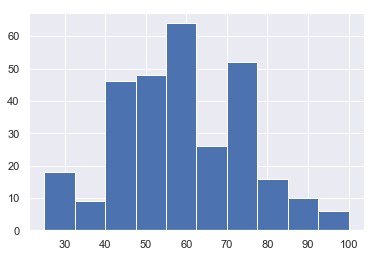

In [223]:
# оставим только строки с оценками больше нуля
stud_math.score = stud_math.score[stud_math.score > 0]
stud_math.score.hist()
stud_math.score.describe()

In [225]:
#посмотрим, есть ли выбросы.
median = stud_math.score.median()
IQR = stud_math.score.quantile(0.75) - stud_math.score.quantile(0.25)
perc25 = stud_math.score.quantile(0.25)
perc75 = stud_math.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 50.0, 75-й перцентиль: 70.0, IQR: 20.0,  Границы выбросов: [20.0, 100.0].


In [226]:
stud_math.corr() #выясним корреляцию баллов для числовых столбцов

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.177997,-0.173320,0.164349,-0.052179,0.178584,0.042294,0.044301,0.135886,-0.049321,0.156343,-0.135110
medu,-0.177997,1.000000,0.640467,-0.184689,0.100489,-0.246589,0.005363,0.022288,0.014602,-0.060797,0.079940,0.189154
fedu,-0.173320,0.640467,1.000000,-0.137377,-0.006660,-0.247365,-0.016192,-0.001958,0.053522,0.021679,0.004985,0.096186
traveltime,0.164349,-0.184689,-0.137377,1.000000,-0.083280,0.022772,0.014774,0.028170,0.026686,-0.023371,-0.016628,-0.110597
studytime,-0.052179,0.100489,-0.006660,-0.083280,1.000000,-0.172306,0.028790,-0.154886,-0.051130,-0.051795,-0.084049,0.192085
failures,0.178584,-0.246589,-0.247365,0.022772,-0.172306,1.000000,0.025776,0.082173,0.083851,0.108037,0.049352,-0.275011
famrel,0.042294,0.005363,-0.016192,0.014774,0.028790,0.025776,1.000000,0.147223,0.102312,0.101390,-0.064722,0.050456
freetime,0.044301,0.022288,-0.001958,0.028170,-0.154886,0.082173,0.147223,1.000000,0.260201,0.071907,0.116601,-0.013787
goout,0.135886,0.014602,0.053522,0.026686,-0.051130,0.083851,0.102312,0.260201,1.000000,0.043190,0.130012,-0.192862
health,-0.049321,-0.060797,0.021679,-0.023371,-0.051795,0.108037,0.101390,0.071907,0.043190,1.000000,-0.027942,-0.067760


failures (-0.24, отрицательная корреляция - чем больше внеучебных неудач - чем ниже обычно и итоговая оценка в школе),
absences (-0.239 - отрицательная корреляция - чем больше пропусков - тем ниже оценка),

medu (0.19 - чем выше образование матери - тем выше итоговая оценка),
goout (-0.155 - отрицательная корреляция - чем больше ребенок проводит времени с друзьями - тем ниже балл),
fedu (0.135 - чем выше образование отца - тем выше итоговый балл),
age (-0.129 - отрицательная корреляция - чем ниже возраст ученика - тем более высокий итоговый балл он имеет),
studytime (0.129 - чем больше времени тратится на дополнительное обучение - тем более высокий итоговый балл,

Высокий коэфициент корреляции (0.63) наблюдается между образованием матери Medu и отца Fedu. Говорит о том, что чем выше образование матери - тем выше и образование отца.

Выясним различия столбца score от значения номинативных переменных.

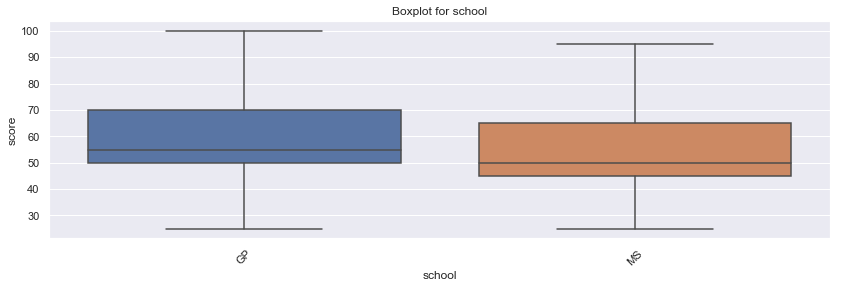

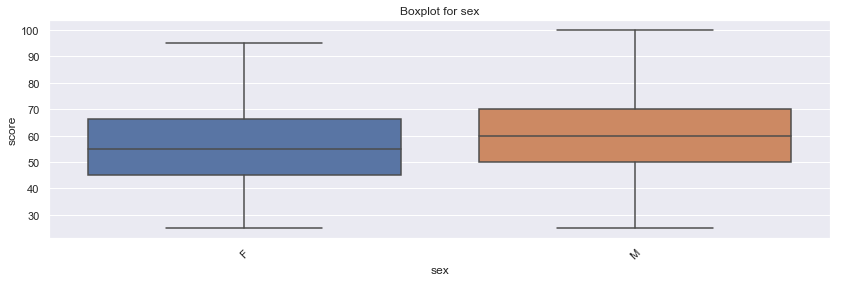

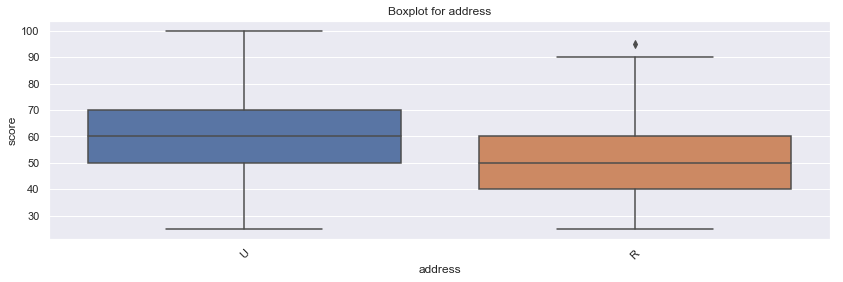

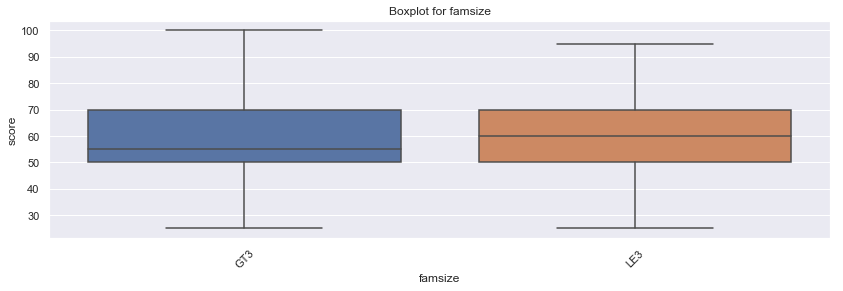

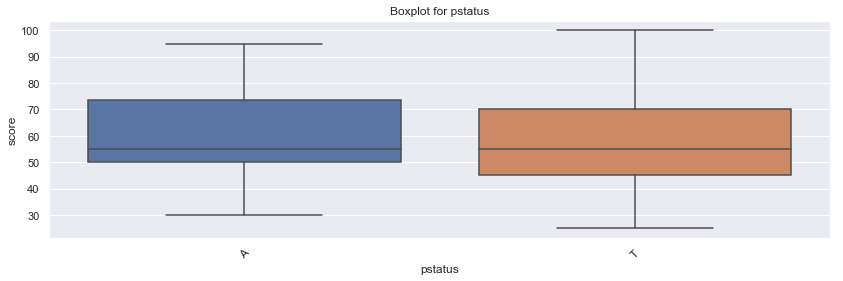

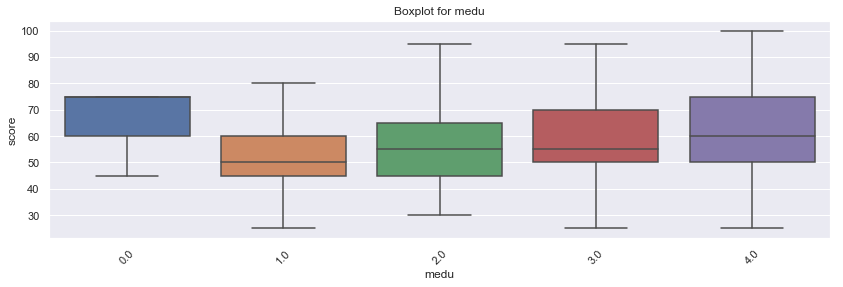

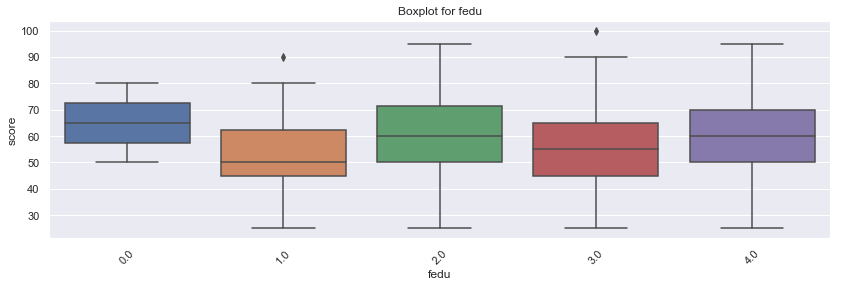

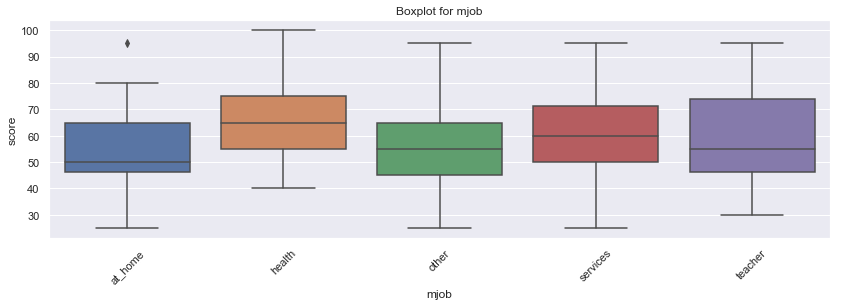

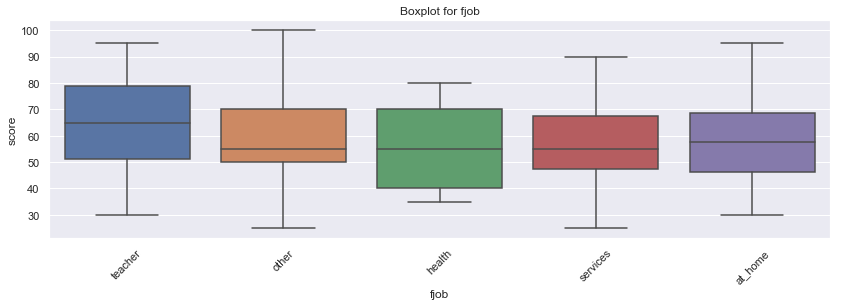

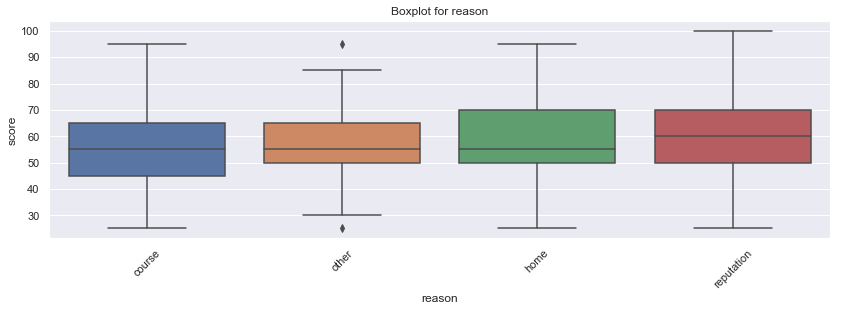

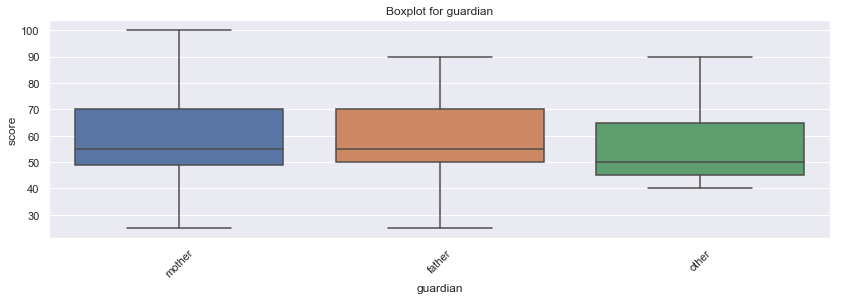

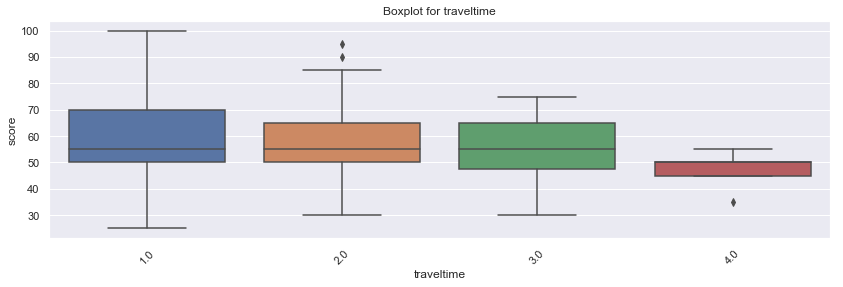

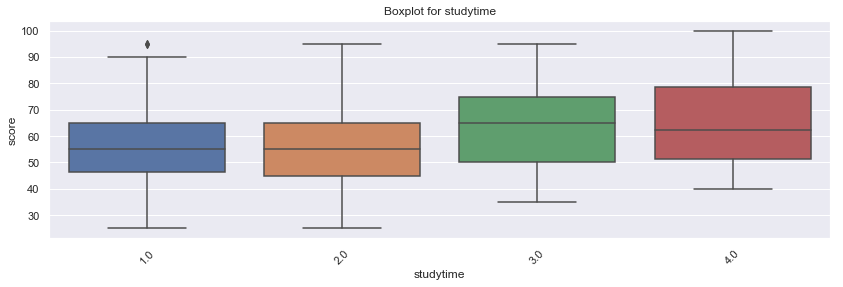

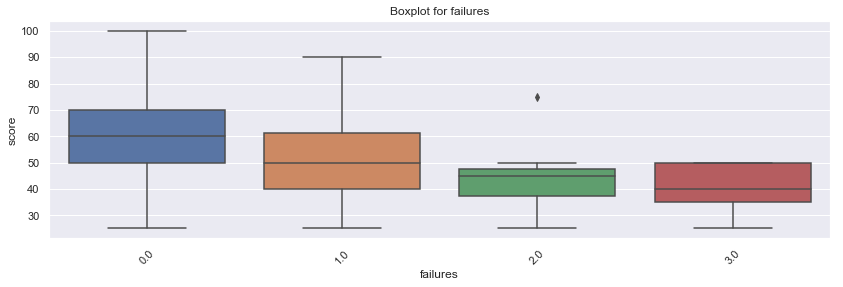

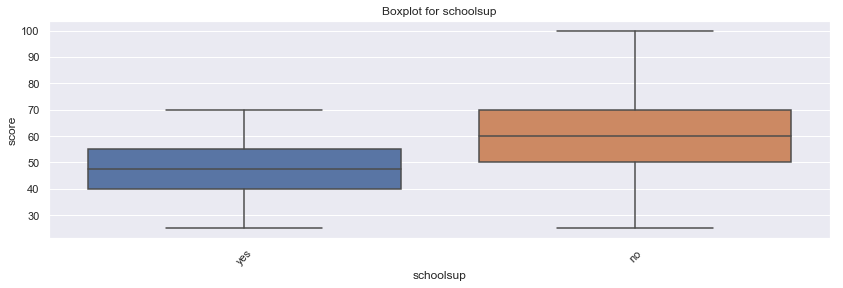

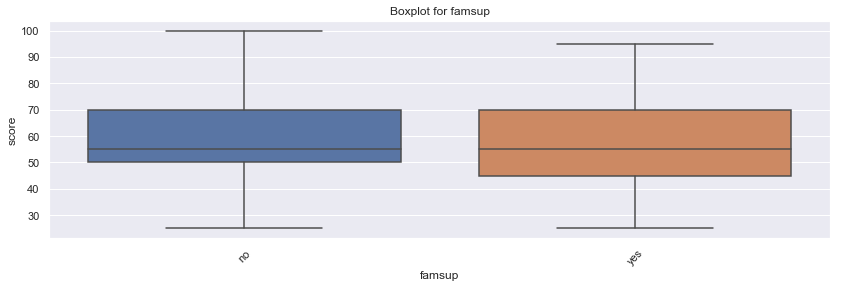

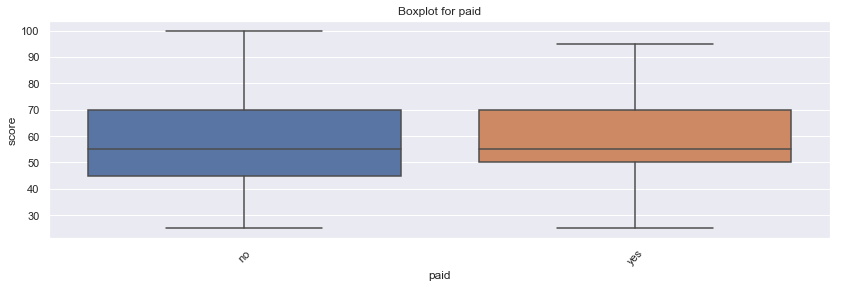

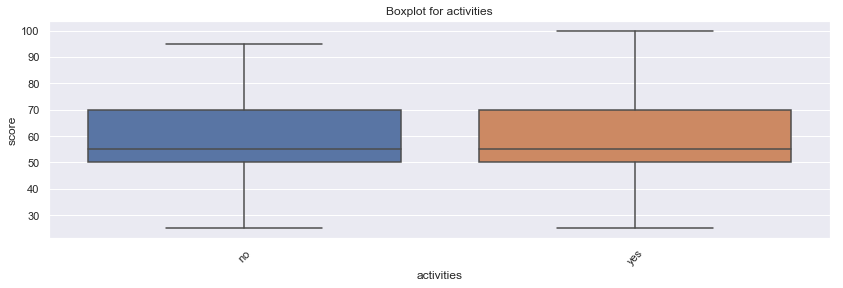

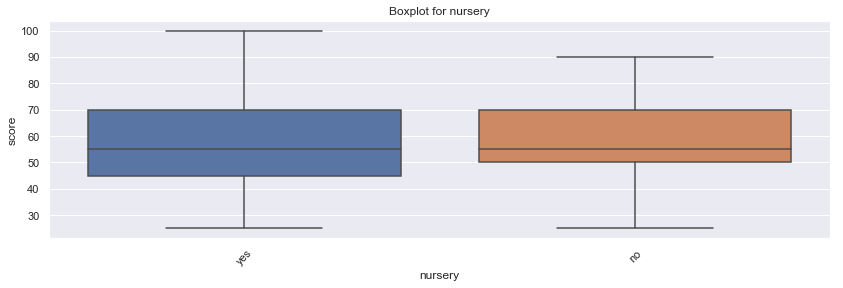

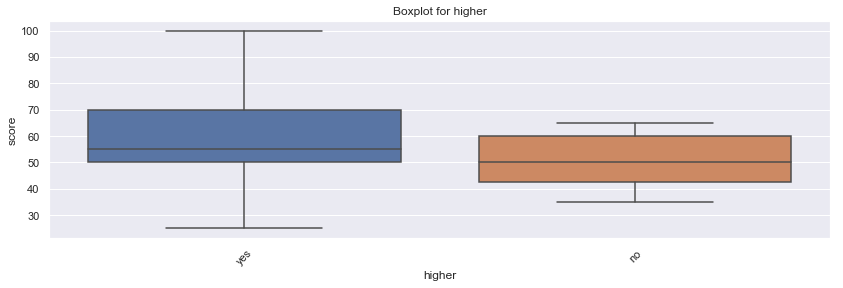

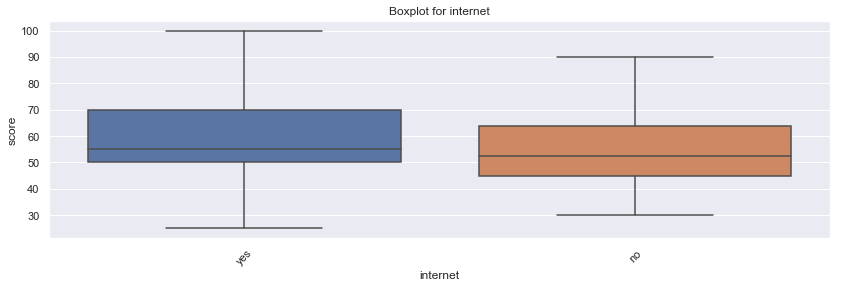

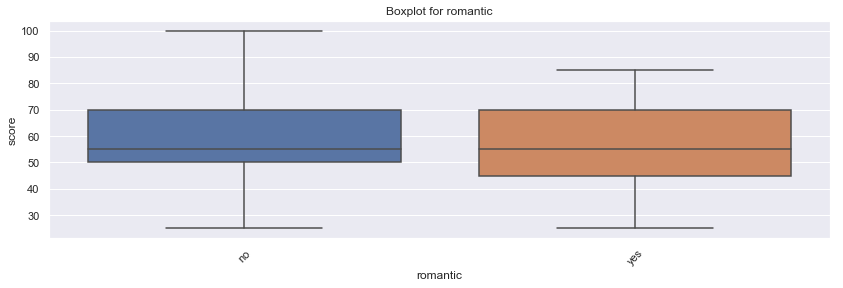

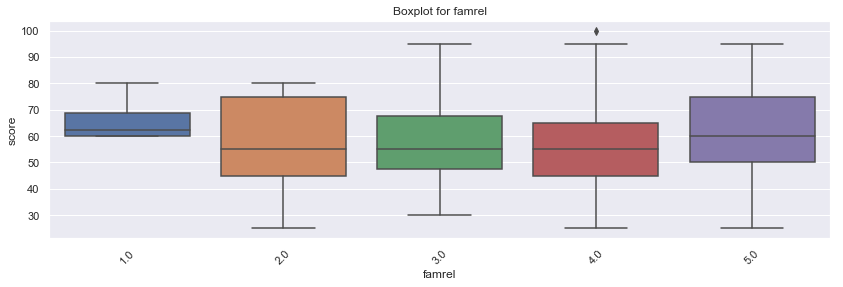

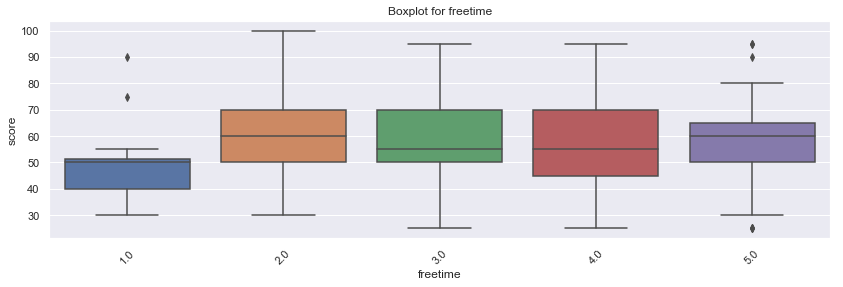

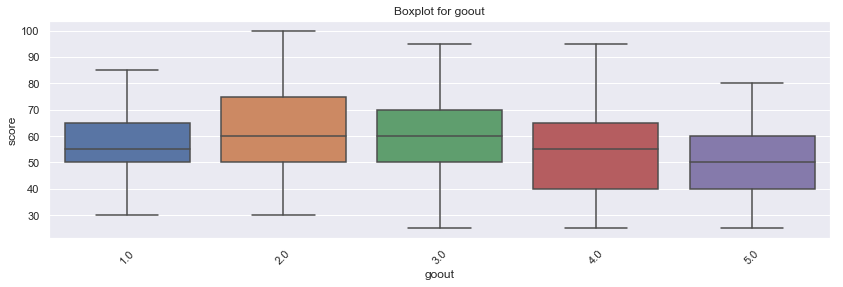

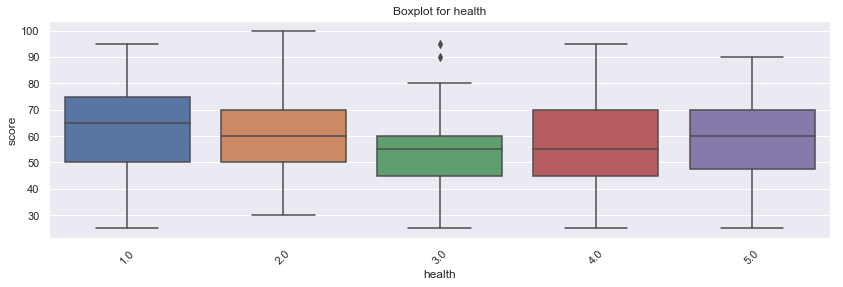

In [229]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

Из графиков видно, что так или иначе могут оказывать влияние на целевую переменную следующие параметры:
address - Баллы городских учеников немного выше, чем баллы сельских.
Medu/Fedu - Образование матери/отца имеет влияние.
Mjob/Fjob - Профессия матери/отца имеет влияние.
failures - Те, кто имеет внеучебные неудачи - получают более низкий балл.
schoolsup - Те, кому оказывается дополнительная образовательная поддержка, имеют более низкие баллы. Возможно, школьная поддержка оказывается "неуспевающим" ученикам.
higher - Ученики, стремящиеся получить высшее образование, имеют более высокий итоговый балл.
goout - Ученики, которые проводят много времени с друзьями получают более низкую оценку.

In [231]:
def get_stat_dif(stud, column):
    combinations_all = list(combinations(
        stud.loc[:, column].dropna().unique(), 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'].dropna(),
                     stud.loc[stud.loc[:, column] == comb[1], 'score'].dropna()).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [233]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(stud_math, col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


In [236]:

students = stud_math.loc[:, ['sex', 'age', 'address', 'medu', 'fedu', 'mjob', 'studytime', 'failures', 'schoolsup', 'higher',
                                 'goout', 'health', 'absences']]
display(students.head(10))
students.info()

,sex,age,address,medu,fedu,mjob,studytime,failures,schoolsup,higher,goout,health,absences
0,F,18,U,4.0,4.0,at_home,2.0,0.0,yes,yes,4.0,3.0,6.0
2,F,15,U,1.0,1.0,at_home,2.0,3.0,yes,yes,2.0,3.0,10.0
3,F,15,U,4.0,2.0,health,3.0,0.0,no,yes,2.0,5.0,2.0
4,F,16,U,3.0,3.0,other,2.0,0.0,no,yes,2.0,5.0,4.0
5,M,16,U,4.0,3.0,services,2.0,0.0,no,yes,2.0,5.0,10.0
6,M,16,U,2.0,2.0,other,2.0,0.0,no,yes,4.0,3.0,0.0
7,F,17,U,4.0,4.0,other,2.0,0.0,yes,yes,4.0,1.0,6.0
8,M,15,U,3.0,2.0,services,2.0,0.0,no,yes,2.0,1.0,0.0
10,F,15,U,4.0,4.0,teacher,2.0,0.0,no,yes,3.0,2.0,0.0
12,M,15,U,4.0,4.0,health,1.0,0.0,no,yes,3.0,5.0,2.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 394
Data columns (total 13 columns):
sex          328 non-null object
age          328 non-null int64
address      328 non-null object
medu         328 non-null float64
fedu         328 non-null float64
mjob         328 non-null object
studytime    328 non-null float64
failures     328 non-null float64
schoolsup    328 non-null object
higher       328 non-null object
goout        328 non-null float64
health       328 non-null float64
absences     328 non-null float64
dtypes: float64(7), int64(1), object(5)
memory usage: 45.9+ KB
